In [1]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from typing_extensions import TypedDict
from typing import Annotated, List
from dotenv import load_dotenv
import os

In [2]:
load_dotenv()
openai_model = os.getenv("OPENAI_MODEL", "gpt-4o-mini")

In [3]:
from langchain_community.tools.tavily_search import TavilySearchResults
tool = TavilySearchResults(max_results=2)
tool.invoke("LangGraph에서 '노드'란 무엇인가요?")

[{'title': 'LangGraph 쉽게 이해하기: 초보자를 위한 가이드 - 메모리허브',
  'url': 'https://memoryhub.tistory.com/entry/LangGraph-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0-%EC%B4%88%EB%B3%B4%EC%9E%90%EB%A5%BC-%EC%9C%84%ED%95%9C-%EA%B0%80%EC%9D%B4%EB%93%9C-%F0%9F%8C%9F',
  'content': '메모리허브\n\n300===Dev Framework/Langgraph\n\nLangGraph 쉽게 이해하기: 초보자를 위한 가이드 🌟\n\n안녕하세요! 오늘은 LLM 애플리케이션 개발에 큰 도움이 되는 LangGraph를 정말 쉽게 설명해 드릴게요. 처음부터 차근차근 알아봅시다!\n\nLangGraph란 무엇인가요? 🤔\n\n여러분이 좋아하는 요리 레시피를 생각해보세요:\n\nLangGraph는 바로 이런 레시피 같은 도구예요! AI 애플리케이션이 따라갈 단계와 흐름을 정해주는 거죠. 🍳\n\n쉽게 말해서, LangGraph는:\n\nLangGraph의 기본 구성요소 📚\n\n1. 노드(Nodes): 할 일들\n\n레시피의 "야채 썰기", "고기 볶기" 같은 각 작업 단계예요.\n\n2. 에지(Edges): 단계들 사이의 연결\n\n"야채 썬 후에 고기 볶기", "소스 넣은 후 간 맞추기" 같은 순서를 정해주는 거예요.\n\n3. 상태(State): 정보 보관함',
  'score': 0.85995835},
 {'title': '23화 22. LangGraph 기본과 응용',
  'url': 'https://brunch.co.kr/@@hqFh/132',
  'content': 'LangGraph(랭그래프)는 에이전트와 도구의 처리를 노드로 표현하고 노드 간의 연결을 엣지로 표현합니다. 가장자리는 다음에 실행할 노드를 지정합니다. LangGraph(랭그래프)는 노드와 엣지를

In [4]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [5]:
llm = ChatOpenAI(model=openai_model)
tools = [tool]
llm_with_tools = llm.bind_tools(tools)

In [6]:
def chatbot(state: State):
    response = llm_with_tools.invoke(state["messages"])
    return {"messages": [response]}

In [7]:
from langgraph.prebuilt import ToolNode
tool_node = ToolNode(tools)

In [8]:
from langgraph.prebuilt import tools_condition

In [9]:
workflow = StateGraph(State)
workflow.add_node("chatbot", chatbot)
workflow.add_node("tools", tool_node)
workflow.add_conditional_edges("chatbot", tools_condition)
workflow.add_edge("tools", "chatbot")
workflow.set_entry_point("chatbot")
graph = workflow.compile()

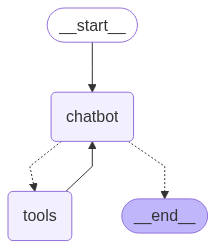

In [10]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
user_input = "LangGraph에서 '노드'란 무엇인가요?"
state = {"messages": [HumanMessage(content=user_input)]}
response = graph.invoke(state)
print(response["messages"][-1].content)

LangGraph에서 '노드'는 그래프에서 실제 작업을 수행하는 단위입니다. 각 노드는 특정 로직을 담당하며, Python 함수로 구현되어 현재 그래프 상태를 입력으로 받아 작업을 수행하고, 그 상태에 대한 업데이트를 반환합니다. 노드는 그래프의 흐름에서 중요한 역할을 하며, 노드 간의 연결은 '엣지'를 통해 정의됩니다.

더 자세한 설명은 [여기](https://deepwiki.com/langchain-ai/langgraph-101/2.2-nodes-and-edges)에서 확인하실 수 있습니다.
